# 🚗 License Plate Recognition System using YOLO & OCR

In [3]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 72.4MB/s]


In [4]:
import yaml

# Path to the YAML file
yaml_path = '/kaggle/input/license-plate-dataset/archive/dataset.yaml'

# Load the YAML
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Fix the 'nc' value to match the number of classes
if 'names' in data:
    data['nc'] = len(data['names'])

# Save the corrected YAML (save to a new path since /kaggle/input is read-only)
corrected_yaml_path = '/kaggle/working/dataset.yaml'
with open(corrected_yaml_path, 'w') as f:
    yaml.dump(data, f)

print(f"Corrected YAML saved to: {corrected_yaml_path}")


Corrected YAML saved to: /kaggle/working/dataset.yaml


In [5]:
train_result = model.train(
    data = "/kaggle/working/dataset.yaml",
    epochs = 5,
    imgsz=640,
    device = 0
)

Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/license-plate-dataset/archive/labels/train... 1525 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1526/1526 [00:12<00:00, 126.19it/s]

train: /kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/license-plate-dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg'


WARNING ⚠️ train: Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.9±8.4 MB/s, size: 162.0 KB)


val: Scanning /kaggle/input/license-plate-dataset/archive/labels/val... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:01<00:00, 118.57it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/license-plate-dataset/archive/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.26G      1.008      2.085      1.018          9        640: 100%|██████████| 96/96 [00:20<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]


                   all        169        169          1      0.818      0.972        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.76G     0.9556      1.204     0.9737          9        640: 100%|██████████| 96/96 [00:17<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all        169        169      0.958      0.952      0.982      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.76G      0.897     0.9698     0.9511          5        640: 100%|██████████| 96/96 [00:16<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        169        169      0.961      0.899      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.76G     0.8395     0.7992     0.9437         12        640: 100%|██████████| 96/96 [00:17<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.58it/s]

                   all        169        169      0.994      0.994      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.76G     0.7669     0.6872     0.9163          8        640: 100%|██████████| 96/96 [00:16<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all        169        169      0.994      0.992      0.994      0.839



5 epochs completed in 0.028 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        169        169      0.994      0.992      0.994      0.839
Speed: 0.4ms preprocess, 2.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


In [6]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")


image 1/1 /kaggle/input/hellouncle/284992.jpeg: 416x640 1 license_plate, 56.6ms
Speed: 3.2ms preprocess, 56.6ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


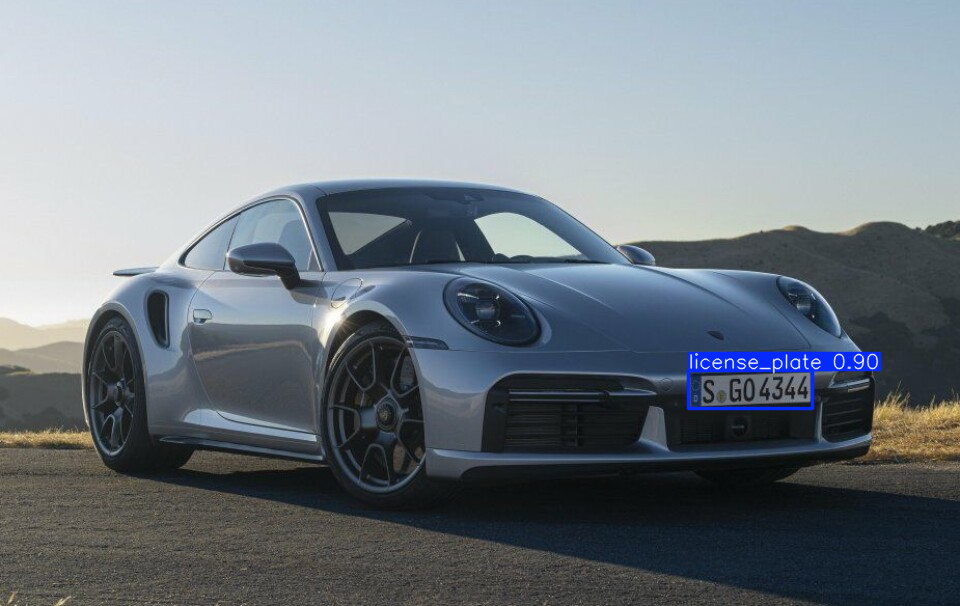

In [18]:
result = model("/kaggle/input/hellouncle/284992.jpeg", save=True)
result[0].show()

In [22]:
import easyocr
import cv2
import matplotlib.pyplot as plt


image 1/1 /kaggle/input/license-plate-dataset/archive/images/train/266d82c7-1b64-44cd-b77c-c08d98175390___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_5c752daa8d168dec865fe0462bf2c0bb_large.jpg: 640x640 1 license_plate, 15.1ms
Speed: 3.2ms preprocess, 15.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


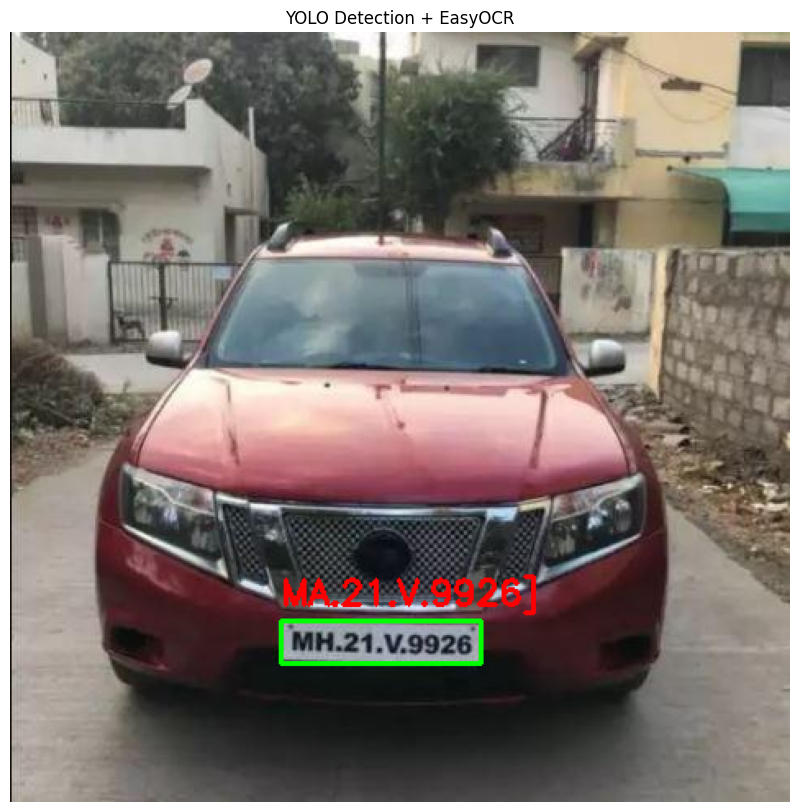

In [31]:
image_path = "/kaggle/input/license-plate-dataset/archive/images/train/266d82c7-1b64-44cd-b77c-c08d98175390___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_5c752daa8d168dec865fe0462bf2c0bb_large.jpg"

results = model(image_path)

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

reader = easyocr.Reader(['en'])

for r in results:
    for box in r.boxes:
        # Get coordinates of the bounding box
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        
        # Crop region from original image
        roi = image[y1:y2, x1:x2]
        
        # Run EasyOCR on cropped region
        ocr_results = reader.readtext(roi)

        # Draw bounding box
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Annotate OCR result on image
        for (bbox, text, prob) in ocr_results:
            cv2.putText(image_rgb, text, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

plt.figure(figsize=(12, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("YOLO Detection + EasyOCR")
plt.show()

In [36]:
detected_texts = []
for (bbox, text, prob) in ocr_results:
            detected_texts.append(text)
    
print("Detected Texts:")
for i, text in enumerate(detected_texts, 1):
    print(f"{i}. {text}")

Detected Texts:
1. MA.21.V.9926]
